In [124]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset & storing it in a variable
health_df=pd.read_csv("health care diabetes.csv")
health_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Project Task: Week 1

In [4]:
health_df.shape

(768, 9)

In [5]:
health_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check for missing values & columns having no variance
health_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
health_df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [8]:
health_df['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [9]:
health_df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [10]:
health_df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [11]:
health_df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [12]:
health_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=health_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
health_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
#Working with Missing Values & Imputation
health_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
69,4,146.0,85.0,27.0,100.0,28.9,0.189,27,0
723,5,117.0,86.0,30.0,105.0,39.1,0.251,42,0
546,5,187.0,76.0,27.0,207.0,43.6,1.034,53,1
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24,0
670,6,165.0,68.0,26.0,168.0,33.6,0.631,49,0
444,4,117.0,62.0,12.0,NaN,29.7,0.380,30,1
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0
184,4,141.0,74.0,NaN,NaN,27.6,0.244,40,0
359,1,196.0,76.0,36.0,249.0,36.5,0.875,29,1
377,1,87.0,60.0,37.0,75.0,37.2,0.509,22,0


In [14]:
health_df['Glucose'].median()

117.0

In [15]:
health_df['BloodPressure'].median()

72.0

In [16]:
health_df['SkinThickness'].median()

29.0

In [17]:
health_df['Insulin'].median()

125.0

In [18]:
health_df['BMI'].median()

32.3

In [19]:
health_df['Glucose']=health_df['Glucose'].fillna(117)
health_df['BloodPressure']=health_df['BloodPressure'].fillna(72)
health_df['SkinThickness']=health_df['SkinThickness'].fillna(29)
health_df['Insulin']=health_df['Insulin'].fillna(125)
health_df['BMI']=health_df['BMI'].fillna(32)

health_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

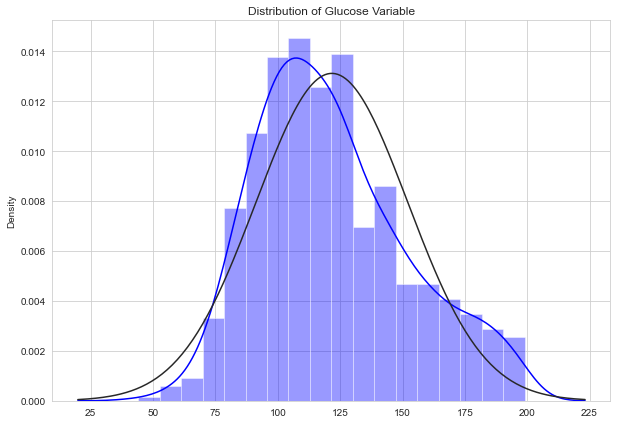

In [125]:
#Visualization to depict distribution of Variables
from scipy.stats import norm
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')

sns.distplot(x=health_df['Glucose'],color='blue',fit=norm)
plt.title("Distribution of Glucose Variable")
plt.show()

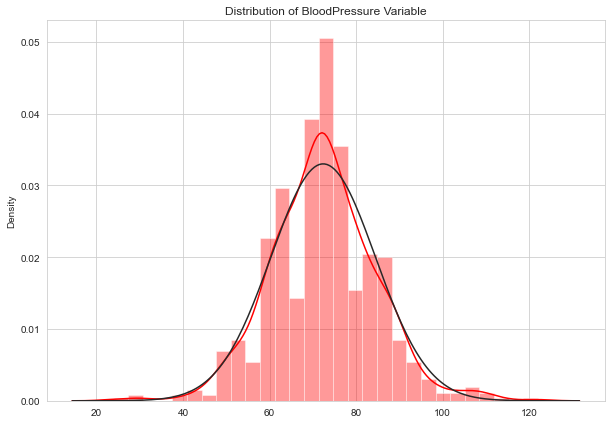

In [126]:
from scipy.stats import norm
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.distplot(x=health_df['BloodPressure'],color='red',fit=norm)
plt.title("Distribution of BloodPressure Variable")
plt.show()

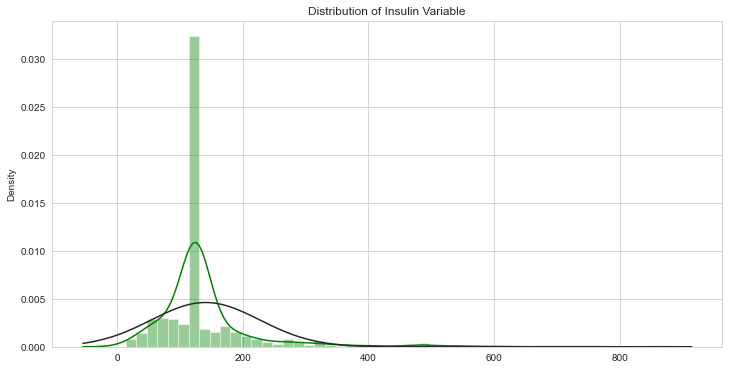

In [127]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(x=health_df['Insulin'],color='green',fit=norm)
plt.title("Distribution of Insulin Variable")
plt.show()

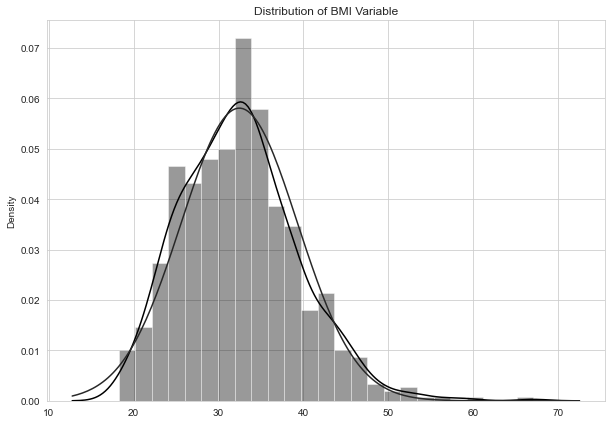

In [128]:
from scipy.stats import norm
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.distplot(x=health_df['BMI'],color='black',fit=norm)
plt.title("Distribution of BMI Variable")
plt.show()

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

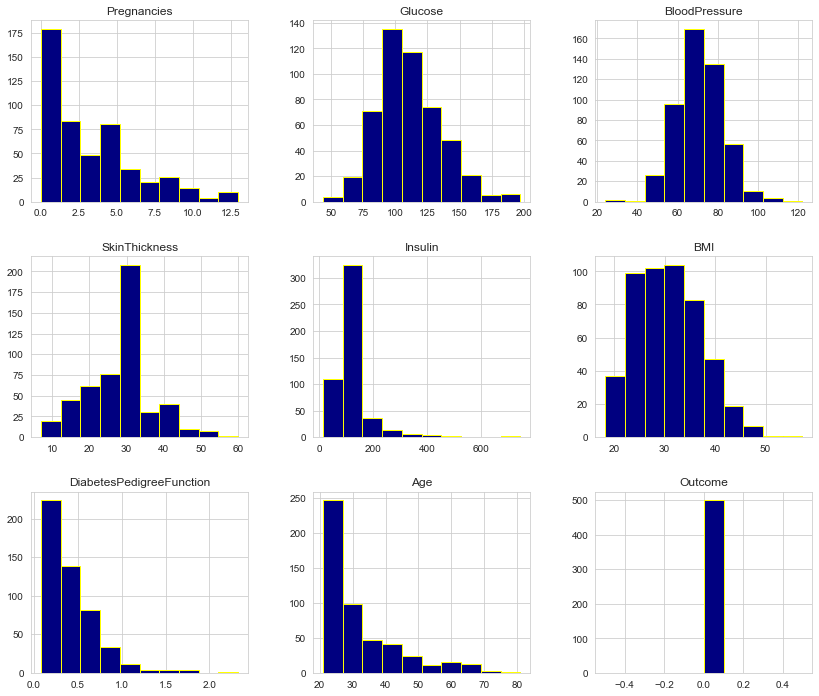

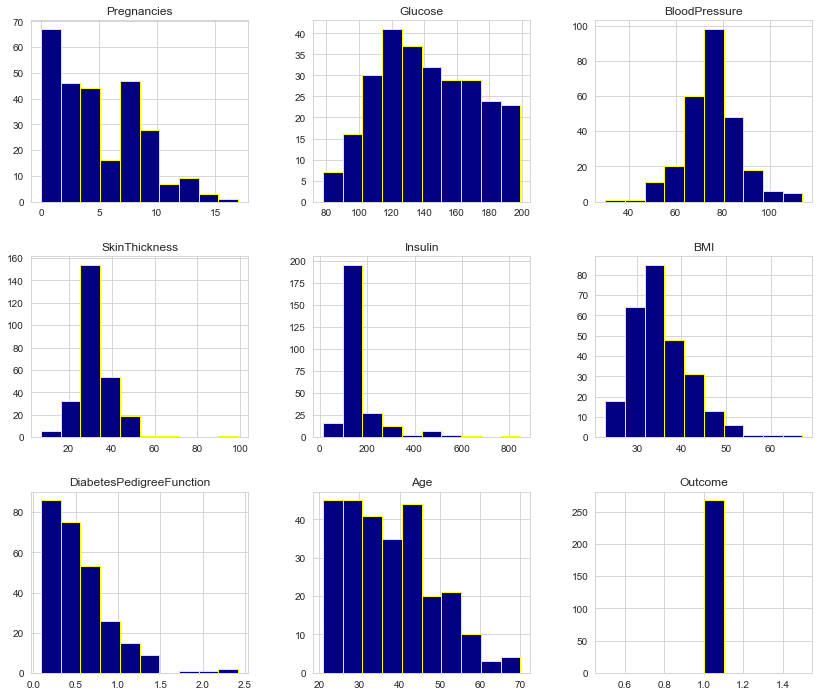

In [24]:
#Visual Exploration of Variables Using Histogram for possible values of Outcome(0,1)
health_df.groupby('Outcome').hist(figsize=(14,12),color='navy',edgecolor='yellow')

In [25]:
#Dtypes of Variables & Outcome
for col,val in health_df.iteritems():
    if(val.dtype=='int64'):
        if(val.nunique()>5):
            print(col," "+'Integer_Type-Continuous')
        else:
            print(col," "+'Integer_Type-Discrete or Categorical')
    elif (val.dtype=='float64'):
        if(val.nunique()>5):
            print(col," "+'Float_Type-Continuous')
        else:
            print(col," "+'Float_Type but Discrete or Categorical')
    else:
        print(col," "+'Object_DType-Categorical')

Pregnancies  Integer_Type-Continuous
Glucose  Float_Type-Continuous
BloodPressure  Float_Type-Continuous
SkinThickness  Float_Type-Continuous
Insulin  Float_Type-Continuous
BMI  Float_Type-Continuous
DiabetesPedigreeFunction  Float_Type-Continuous
Age  Integer_Type-Continuous
Outcome  Integer_Type-Discrete or Categorical


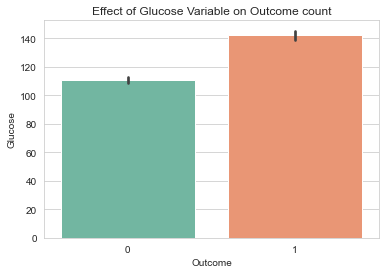

In [26]:
#Count of variables for outcome classes
sns.barplot(x='Outcome',y="Glucose",data=health_df,palette='Set2')
plt.title("Effect of Glucose Variable on Outcome count")
plt.show()

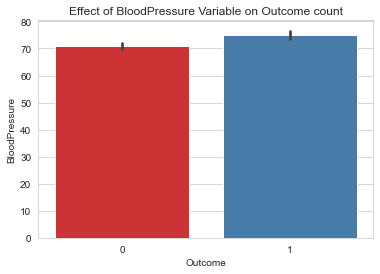

In [27]:
sns.barplot(x='Outcome',y="BloodPressure",data=health_df,palette='Set1')
plt.title("Effect of BloodPressure Variable on Outcome count")
plt.show()

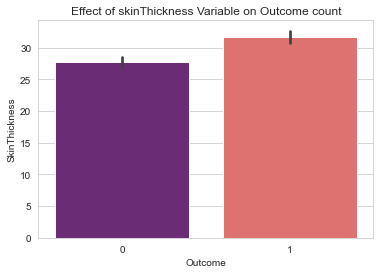

In [28]:
sns.barplot(x='Outcome',y="SkinThickness",data=health_df,palette='magma')
plt.title("Effect of skinThickness Variable on Outcome count")
plt.show()

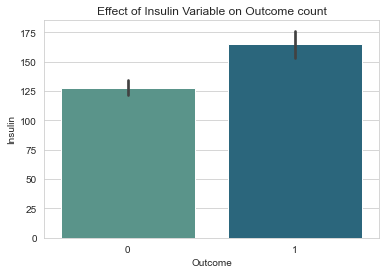

In [29]:
sns.barplot(x='Outcome',y="Insulin",data=health_df,palette='crest')
plt.title("Effect of Insulin Variable on Outcome count")
plt.show()

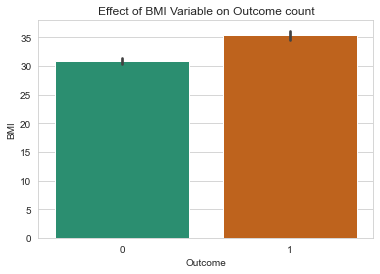

In [30]:
sns.barplot(x='Outcome',y="BMI",data=health_df,palette='Dark2')
plt.title("Effect of BMI Variable on Outcome count")
plt.show()

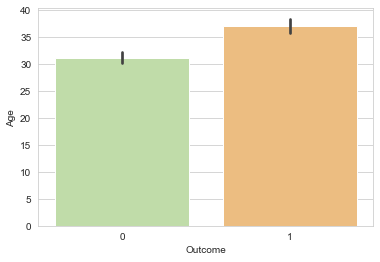

In [31]:
sns.barplot(x='Outcome',y="Age",data=health_df,palette='Spectral_r');

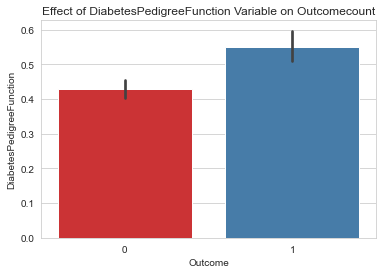

In [32]:
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=health_df,palette='Set1');
plt.title("Effect of DiabetesPedigreeFunction Variable on Outcomecount")
plt.show()

# Project Task: Week 2


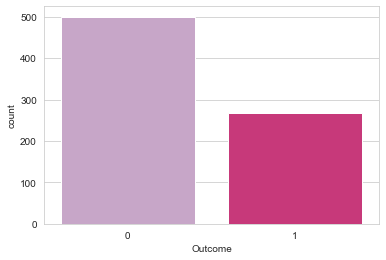

In [33]:
#Data Exploration
sns.countplot(x='Outcome',data=health_df,palette='PuRd');

In [34]:
health_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
health_df.shape

(768, 9)

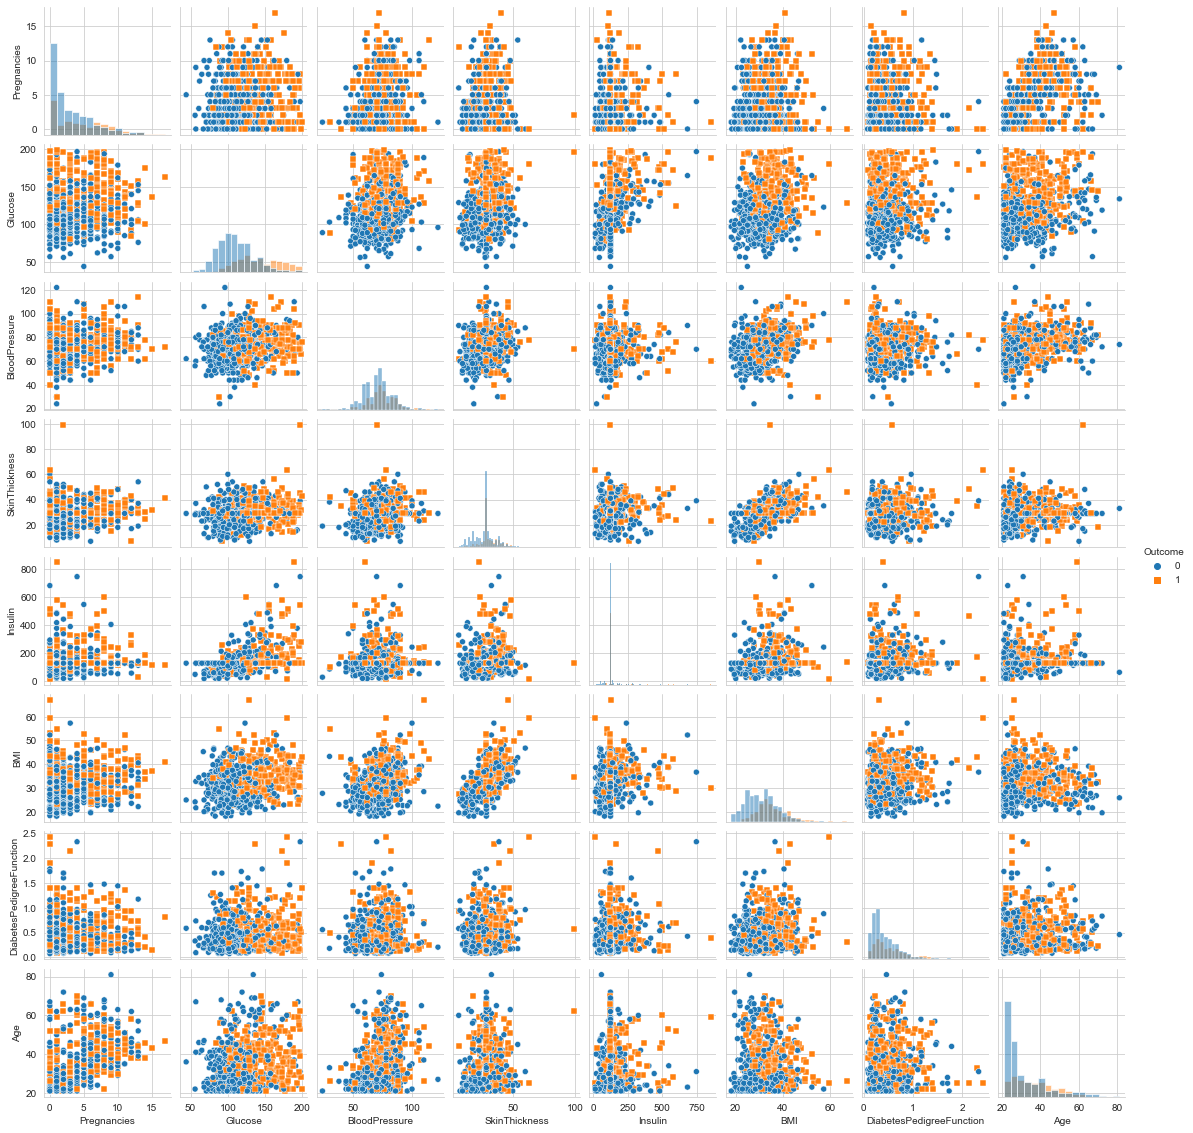

In [36]:
sns.pairplot(health_df,hue='Outcome',palette='tab10',height=2,diag_kind='hist',markers=['o','s']);

In [37]:
#Correlation Analysis
health_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543275,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180373,0.126503,0.097101,0.203790
BMI,0.021546,0.231400,0.281132,0.543275,0.180373,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312249,0.173844,0.238356,1.000000


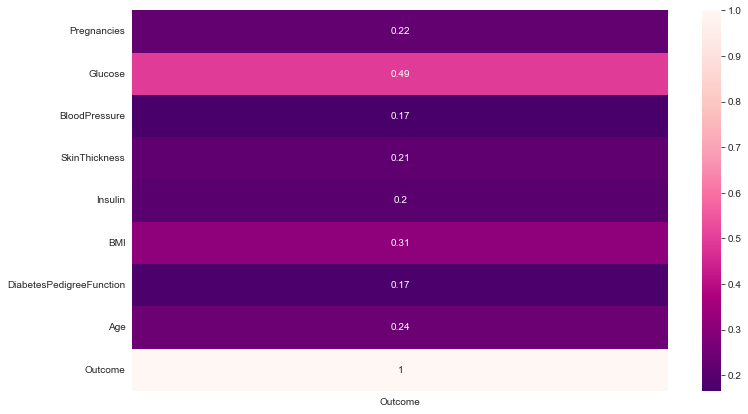

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(health_df.corr()[['Outcome']],annot=True, cmap='RdPu_r');

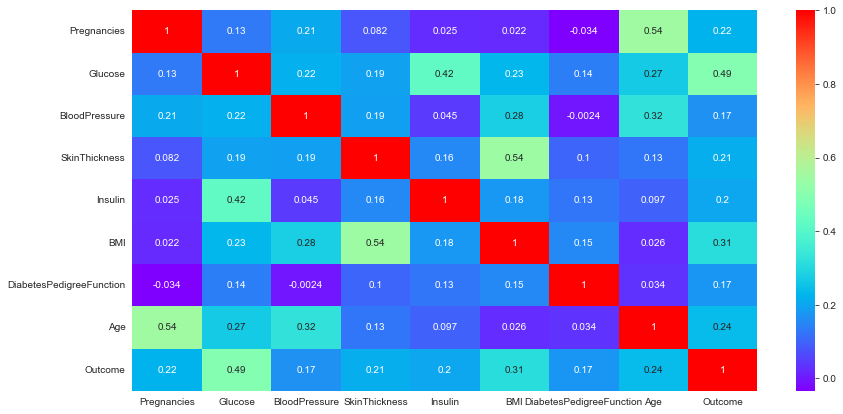

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(health_df.corr(),annot=True, cmap='rainbow');

In [40]:
#Outlier Detection & Removal
health_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

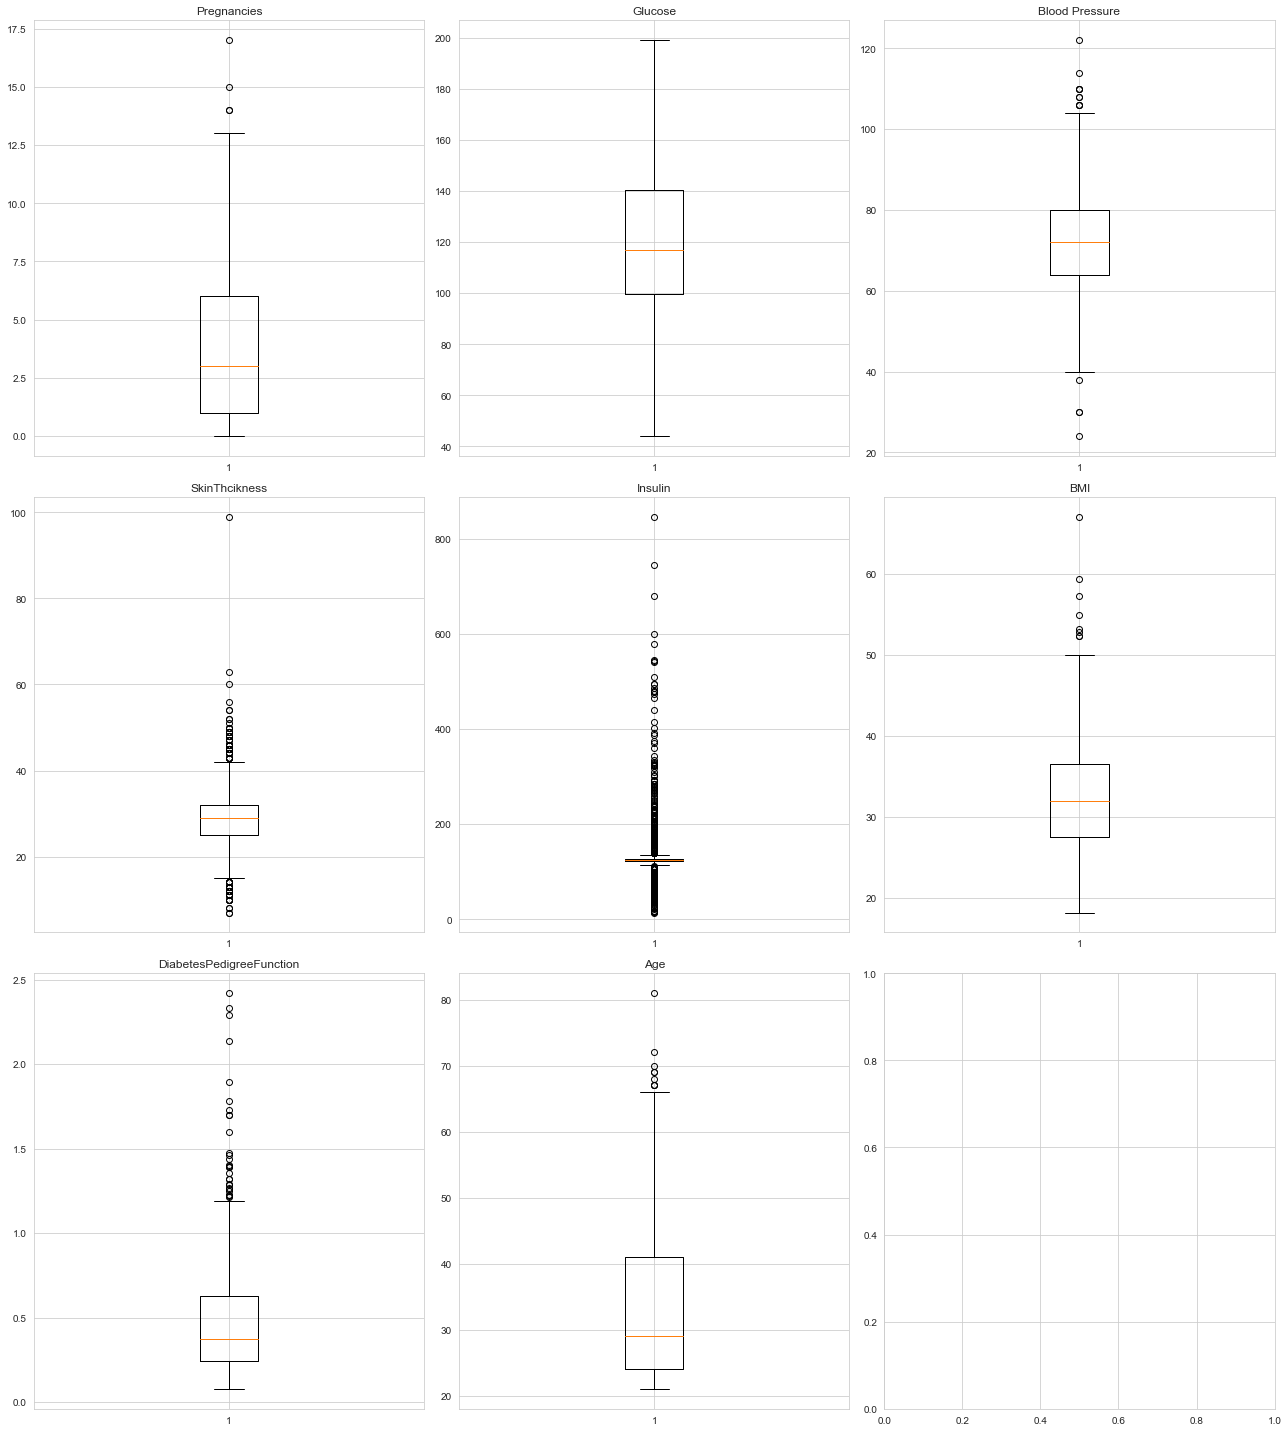

In [41]:
fig,ax=plt.subplots(3,3,figsize=(18,20))
ax[0,0].boxplot(health_df['Pregnancies'])
ax[0,1].boxplot(health_df['Glucose'])
ax[0,2].boxplot(health_df['BloodPressure'])
ax[1,0].boxplot(health_df['SkinThickness'])
ax[1,1].boxplot(health_df['Insulin'])
ax[1,2].boxplot(health_df['BMI'])
ax[2,0].boxplot(health_df['DiabetesPedigreeFunction'])
ax[2,1].boxplot(health_df['Age'])
ax[0,0].set_title('Pregnancies')
ax[0,1].set_title('Glucose')
ax[0,2].set_title('Blood Pressure')
ax[1,0].set_title('SkinThcikness')
ax[1,1].set_title('Insulin')
ax[1,2].set_title('BMI')
ax[2,0].set_title('DiabetesPedigreeFunction')
ax[2,1].set_title('Age')
plt.tight_layout()
plt.show();

In [42]:
health_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
#Creating a copy of Health_df
health=health_df.copy()
health.shape

(768, 9)

# Project Task: Week 3

In [44]:
#Check for significant features
import statsmodels.api as sm
features=health.drop(columns='Outcome')
target=health['Outcome']
sm_model=sm.OLS(target,features).fit()
sm_model
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.496
Method:                 Least Squares   F-statistic:                              95.66
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                   1.28e-109
Time:                        01:03:47   Log-Likelihood:                         -417.96
No. Observations:                 768   AIC:                                      851.9
Df Residuals:                     760   BIC:                                      889.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0247      0.005      4.613      0.000       0.014       0.035
Glucose                      0.0052      0.001      9.271      0.000       0.004       0.006
BloodPressure               -0.0084      0.001     -7.227      0.000      -0.011      -0.006
SkinThickness               -0.0009      0.002     -0.448      0.654      -0.005       0.003
Insulin                     -0.0001      0.000     -0.602      0.548      -0.001       0.000
BMI                          0.0072      0.003      2.724      0.007       0.002       0.012
DiabetesPedigreeFunction     0.0925      0.047      1.984      0.048       0.001       0.184
Age                          0.0004      0.002      0.225      0.822      -0.003       0.004
==============================================================================
Omnibus:                      195.899   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.733
Skew:                           0.519   Prob(JB):                     3.23e-15
Kurtosis:                       1.995   Cond. No.                         675.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
health.corr()['Outcome']*100

Pregnancies                  22.189815
Glucose                      49.278240
BloodPressure                16.572291
SkinThickness                21.487322
Insulin                      20.379034
BMI                          31.224903
DiabetesPedigreeFunction     17.384407
Age                          23.835598
Outcome                     100.000000
Name: Outcome, dtype: float64

On analysing the p_value of features, we find that features like { Age,SkinThickness & Insulin)
are statistically insignificant.

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(features,target)
ExtraTreesClassifier()
print(model.feature_importances_)

[0.10528853 0.23799328 0.09625669 0.08503702 0.08482992 0.14188945
 0.11555594 0.13314917]


<AxesSubplot:>

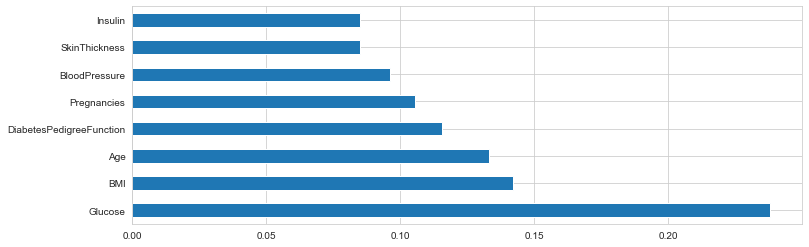

In [47]:
plt.figure(figsize=(12,4))
ranked_features=pd.Series(model.feature_importances_,index=health.columns[:-1])
ranked_features.nlargest(8).plot(kind='barh')

In [48]:
health.corr()['Outcome'].sort_values(ascending=True)*100

BloodPressure                16.572291
DiabetesPedigreeFunction     17.384407
Insulin                      20.379034
SkinThickness                21.487322
Pregnancies                  22.189815
Age                          23.835598
BMI                          31.224903
Glucose                      49.278240
Outcome                     100.000000
Name: Outcome, dtype: float64

On analysing 1)the p_value of features using OLS Statsmodels we find that features like
{ Age,SkinThickness & Insulin) are statistically insignificant where as 2)ExtraTreeClassifier
predicts features like (BloodPressure,SkinThickness & Insulin) are leastsignificant whereas
3) Correlation matrix describes BloodPressure ,SkinThickness ,Pregnancies,Insulin to be
amongst least correlated the outcome. So combining results from 1) & 2) and using
correlation value,

We conclude that features like Insulin,SkinThickness are not significant.

In [49]:
#Hence, we might not consider these features for model building.
features=features.drop(columns=['Insulin','SkinThickness'])
features.shape

(768, 6)

In [50]:
#Outlier Detection & removal
q1=health_df['DiabetesPedigreeFunction'].quantile(0.25)
q3=health_df['DiabetesPedigreeFunction'].quantile(0.75)
iqr=q3-q1
max=1.5*iqr+ q3
min=q1-1.5*iqr
print(max,min)

1.2 -0.32999999999999996


In [51]:
np.where(health_df['DiabetesPedigreeFunction']>1.3)

(array([  4,  12,  39,  45,  58, 147, 187, 228, 243, 259, 308, 330, 370,
        371, 395, 445, 593, 621, 622, 661], dtype=int64),)

In [52]:
np.where(health_df['DiabetesPedigreeFunction']<-0.32)

(array([], dtype=int64),)

In [53]:
np.where(health_df['Pregnancies']>13)

(array([ 88, 159, 298, 455], dtype=int64),)

In [54]:
np.where(health_df['BMI']>60)

(array([177], dtype=int64),)

In [55]:
np.where(health_df['BloodPressure']>110)

(array([106, 691], dtype=int64),)

In [56]:
np.where(health_df['BloodPressure']<30)

(array([597], dtype=int64),)

In [57]:
outliers={4, 12, 39, 45, 58, 147, 187, 228, 243, 259, 308, 330,
370,371, 395, 593, 621, 622, 661,88, 159, 298, 455}
outliers=list(outliers)
outliers

[259,
 4,
 455,
 330,
 395,
 12,
 593,
 147,
 661,
 88,
 159,
 228,
 39,
 298,
 45,
 621,
 622,
 370,
 243,
 308,
 371,
 58,
 187]

In [58]:
health=health.drop(outliers,axis=0)
health.shape

(745, 9)

In [59]:
#Handling Class Imbalanced Data & Over_Sampling
health=health.drop(columns=['Insulin','SkinThickness'])
health.shape

(745, 7)

In [60]:
health['Outcome'].value_counts(normalize=True)*100

0    65.771812
1    34.228188
Name: Outcome, dtype: float64

In [61]:
health['Outcome'].value_counts()

0    490
1    255
Name: Outcome, dtype: int64

It is evident that Outcome has imbalanced data as 253 observations belong to Class 0 (i.e 34%)
while 489 observations belong to Class 1(i.e 66%)
Since the size of the Dataset is small, we can consider :

#1)Over_Sampling Technique to balance the data

First we will divide the dataset into two parts, one for training & validation and other for
testing. So, first we will use Train_test_split to divide the dataset & then use SKF for training
& validation.

In [62]:
health.shape

(745, 7)

In [63]:
data=health.drop(columns='Outcome')
target=health['Outcome']

In [64]:
#Splitting the dataset into 1)Train & Validation Set and 2)Test Set
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(data, target, test_size = 0.2,
random_state = 1)
print(x.shape, x_test.shape, y.shape, y_test.shape)

(596, 6) (149, 6) (596,) (149,)


In [65]:
y.value_counts()

0    391
1    205
Name: Outcome, dtype: int64

In [66]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [67]:
#Oversampling by SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_os,y_os=smote.fit_resample(x,y)
y_os.value_counts()

0    391
1    391
Name: Outcome, dtype: int64

In [73]:
#Startified K-Fold CV
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')

from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(solver = 'newton-cg', C = 1000,
penalty='l2')

from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=50,max_depth=40)

from sklearn.svm import SVC
model4=SVC()

from sklearn.naive_bayes import GaussianNB
model5=GaussianNB(var_smoothing=1e-07)

from xgboost import XGBClassifier
model6=XGBClassifier(base_score=0.25, booster='gbtree',colsample_bylevel=1, colsample_bynode=1,colsample_bytree=1,n_estimators=50)

from sklearn.model_selection import cross_val_score
def get_scores(model):
    score=cross_val_score(model,x_os,y_os,cv=skf)
    mean_score=np.mean(score)
    print('Model: ',model)
    return mean_score

get_scores(model1)

Model:  KNeighborsClassifier()


0.76734443900049

In [72]:
get_scores(model2)

Model:  LogisticRegression(C=1000, solver='newton-cg')


0.7404458598726114

In [74]:
get_scores(model3)

Model:  RandomForestClassifier(max_depth=40, n_estimators=50)


0.8069737056998203

In [75]:
get_scores(model3)

Model:  RandomForestClassifier(max_depth=40, n_estimators=50)


0.8185040013065491

In [76]:
get_scores(model5)

Model:  GaussianNB(var_smoothing=1e-07)


0.7199330393597909

In [77]:
get_scores(model6)

Model:  XGBClassifier(base_score=0.25, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, ...)


0.7839784419402254

Comparing the performance of KNN Algorithm with five other Algoritms using Stratified KFold
CV score, KNN is 3rd ranked model in terms of accuracy while Random Forest gives
the best result & Naive Bayes being the worst performer.

# Project Task: Week 4

In [78]:
#Model Building Using KNeighbours Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=9, p=2,metric='minkowski')
model1.fit(x_os,y_os)
KNeighborsClassifier(n_neighbors=9)
model1.score(x_os,y_os)

0.8222506393861893

In [80]:
y_pred1=model1.predict(x_test)
model1.score(x_test,y_test)

0.7718120805369127

In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred1)
cm

array([[77, 22],
       [12, 38]], dtype=int64)

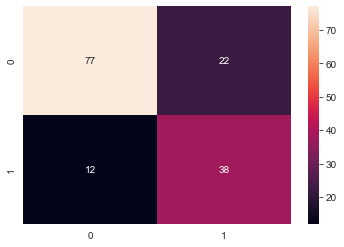

In [83]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='0.0f');

In [84]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.63      0.76      0.69        50

    accuracy                           0.77       149
   macro avg       0.75      0.77      0.76       149
weighted avg       0.79      0.77      0.78       149



In [85]:
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity:", sensitivity)
print("Specificity:", np.round((specificity),2))

Sensitivity: 0.76
Specificity: 0.78


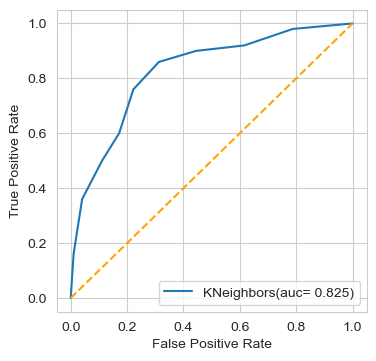

In [87]:
#ROC Curve & AUC
from sklearn.metrics import roc_curve,auc
y_curve=model1.predict_proba(x_test)[:,1]
FPR,TPR,threshold=roc_curve(y_test,y_curve)
auc=auc(FPR,TPR)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(FPR,TPR,label="KNeighbors(auc= %0.3f)"% auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [91]:
#Model Building Using Random Forest Classifier
model3=RandomForestClassifier(n_estimators=70,max_depth=20,criterion='entropy',min_samples_split=4,
max_leaf_nodes=25,min_samples_leaf=3,max_samples=0.2,max_features=3)
model3.fit(x_os,y_os)
RandomForestClassifier(criterion='entropy', max_depth=20,
max_features=3,
                      max_leaf_nodes=25, max_samples=0.2,
min_samples_leaf=3,
                      min_samples_split=4, n_estimators=70)
model3.score(x_test,y_test)

0.7919463087248322

In [92]:
model3.score(x_os,y_os)

0.8452685421994884

In [93]:
y_pred3=model3.predict(x_test)

<AxesSubplot:>

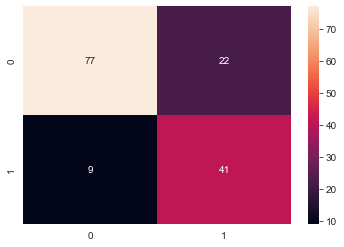

In [94]:
#Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred3)
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, fmt ='0.0f')

In [95]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        99
           1       0.65      0.82      0.73        50

    accuracy                           0.79       149
   macro avg       0.77      0.80      0.78       149
weighted avg       0.81      0.79      0.80       149



In [96]:
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity:", sensitivity)
print("Specificity:", np.round((specificity),2))

Sensitivity: 0.82
Specificity: 0.78


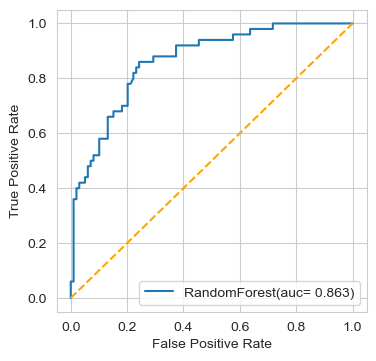

In [98]:
#Roc curve & AUC
from sklearn.metrics import roc_curve,auc
y_curve=model3.predict_proba(x_test)[:,1]
FPR,TPR,threshold=roc_curve(y_test,y_curve)
auc_RF=auc(FPR,TPR)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(FPR,TPR,label="RandomForest(auc= %0.3f)"% auc_RF)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Model Building Using Logistic Regression


In [99]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(solver = 'newton-cg', C = 1000,
penalty='l2')
model2.fit(x_os,y_os)
LogisticRegression(C=1000, solver='newton-cg')
model2.score(x_os,y_os)

0.7429667519181585

In [100]:
model2.score(x_test,y_test)

0.7718120805369127

In [101]:
y_pred2=model2.predict(x_test)

<AxesSubplot:>

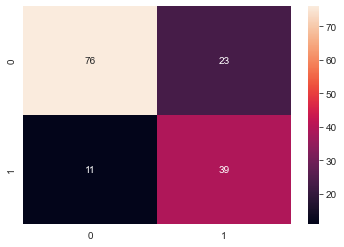

In [102]:
#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred2)
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt =
'0.0f')

In [103]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.63      0.78      0.70        50

    accuracy                           0.77       149
   macro avg       0.75      0.77      0.76       149
weighted avg       0.79      0.77      0.78       149



In [104]:
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity:", np.round((sensitivity),2))
print("Specificity:", np.round((specificity),2))

Sensitivity: 0.78
Specificity: 0.77


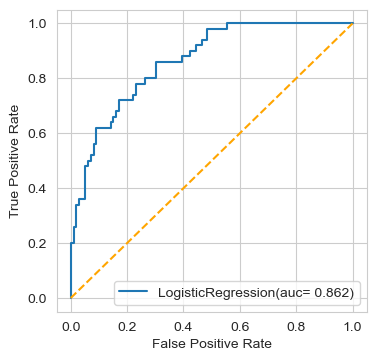

In [105]:
#ROC Curve & AUC
from sklearn.metrics import roc_curve,auc
y_curve=model2.predict_proba(x_test)[:,1]
FPR,TPR,threshold=roc_curve(y_test,y_curve)
auc=auc(FPR,TPR)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(FPR,TPR,label="LogisticRegression(auc= %0.3f)"% auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [107]:
#Model Building Using SVM
from sklearn.svm import SVC
model4=SVC(C=10,gamma=0.0001,probability=True)
model4.fit(x_os,y_os)
SVC(C=10, gamma=0.0001, probability=True)
model4.score(x_os,y_os)

0.7672634271099744

In [108]:
model4.score(x_test,y_test)

0.7651006711409396

In [109]:
y_pred4=model4.predict(x_test)

<AxesSubplot:>

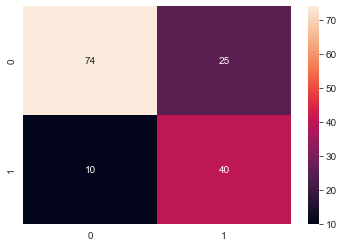

In [110]:
#Classifiaction Metrics
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred4)
cm=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot = True, fmt ='0.0f')

In [111]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        99
           1       0.62      0.80      0.70        50

    accuracy                           0.77       149
   macro avg       0.75      0.77      0.75       149
weighted avg       0.79      0.77      0.77       149



In [112]:
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity:", np.round((sensitivity),2))
print("Specificity:", np.round((specificity),2))

Sensitivity: 0.8
Specificity: 0.75


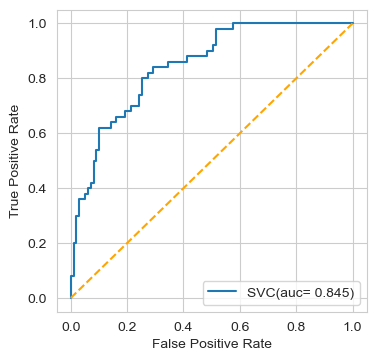

In [113]:
#Roc Curve & AUC
from sklearn.metrics import roc_curve,auc
y_curve=model4.predict_proba(x_test)[:,1]
FPR,TPR,threshold=roc_curve(y_test,y_curve)
auc=auc(FPR,TPR)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(FPR,TPR,label="SVC(auc= %0.3f)"% auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [116]:
#Model Building Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB(var_smoothing=1e-07)
model5.fit(x_os,y_os)
GaussianNB(var_smoothing=1e-07)
model5.score(x_os,y_os)

0.7289002557544757

In [118]:
model5.score(x_test,y_test)

0.7651006711409396

In [119]:
y_pred5=model5.predict(x_test)

<AxesSubplot:>

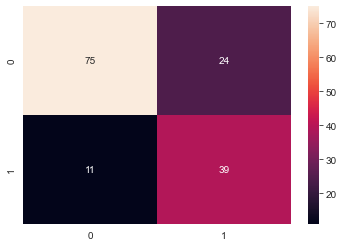

In [120]:
#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred5)
cm=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred5), annot = True, fmt =
'0.0f')

In [121]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.62      0.78      0.69        50

    accuracy                           0.77       149
   macro avg       0.75      0.77      0.75       149
weighted avg       0.79      0.77      0.77       149



In [122]:
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])
print("Sensitivity:", np.round((sensitivity),2))
print("Specificity:", np.round((specificity),2))

Sensitivity: 0.78
Specificity: 0.76


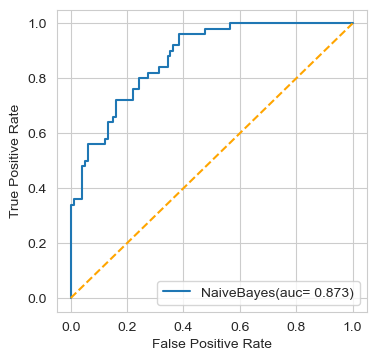

In [123]:
#ROC Curve & AUC
from sklearn.metrics import roc_curve,auc
y_curve=model5.predict_proba(x_test)[:,1]
FPR,TPR,threshold=roc_curve(y_test,y_curve)
auc=auc(FPR,TPR)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(FPR,TPR,label="NaiveBayes(auc= %0.3f)"% auc)
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Comparing the results of all the models taking into account F1-score,precision,accuracy & AUC.
Considering AUC , Naive Baiyes Tops the list.
considering F1-score,precision,accuracy, Random Forest Classifier is at the top.
Here, I choose Random Forest Classifier as the best model.